develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.


#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
X.shape

(50,)

In [5]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

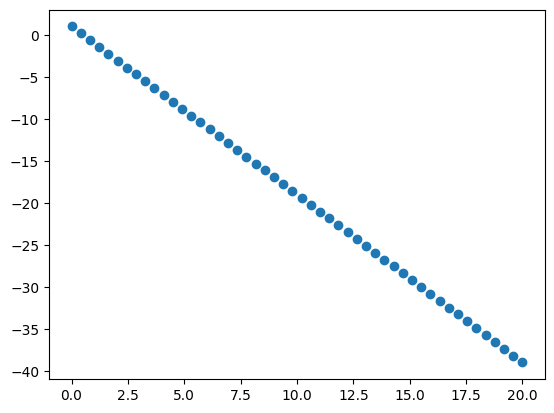

In [6]:
plt.plot(X,y,'o')

#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).


In [137]:
import numpy as np

def gradient_descent_single_variable(X, y, alpha, max_iterations, stop=0.001, convergence=0.001):
    theta0 = 0
    theta1 = 0
    i = 0
    cost= []
    theta0_values = []
    theta1_values = []

    while i < max_iterations:
        theta0_values.append(theta0)
        theta1_values.append(theta1)
        hx = theta0 + theta1 * X
        error = hx - y
        mse = 0.5 * np.linalg.norm(error) ** 2 / len(X)
        cost.append(mse)
        gtheta0 = np.sum(error) / len(X)
        gtheta1 = np.sum(error * X) / len(X)
        
        if np.linalg.norm(np.array([gtheta0, gtheta1])) < stop:
            print("Gradient descent has converged using (stop criteria).")
            break

        if len(cost) > 1 and abs(cost[-2] - cost[-1]) < convergence:
            print("Converged based on (stop criteria)")
            break


        theta0 = theta0 - alpha * gtheta0
        theta1 = theta1 - alpha * gtheta1



        print(f"****************** Iteration {i} ********************\n")
        print(f"h(x):{hx}\n")
        print()
        print(f"error vector :\n{error}\n")
        print("j=\n", mse)
        print()
        print("Gradient Vector:/n", gtheta0, gtheta1)
        print()
        print("norm of gradint",np.linalg.norm(np.array([gtheta0, gtheta1])))
        print()
        print("theta0\n", theta0)
        print()
        print("theta1\n", theta1)


        i += 1

    return {
        'theta0_values': theta0_values,
        'theta1_values': theta1_values,
        'cost': cost,
        'optimum0': theta0,
        'optimum1': theta1
    }




##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [138]:

result = gradient_descent_single_variable(X, y, alpha=0.0005, max_iterations=300)



****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


error vector :
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j=
 249.88775510204087

Gradient Vector:/n 19.0 259.38775510204084

norm of gradint 260.08269357432516

theta0
 -0.0095

theta1
 -0.12969387755102044
***********

#### Calculate r2 score

In [139]:
from sklearn.metrics import r2_score

In [140]:
r2_score(y, result['optimum0'] + result['optimum1'] * X)

0.9975512733076476

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

Text(0, 0.5, 'Loss')

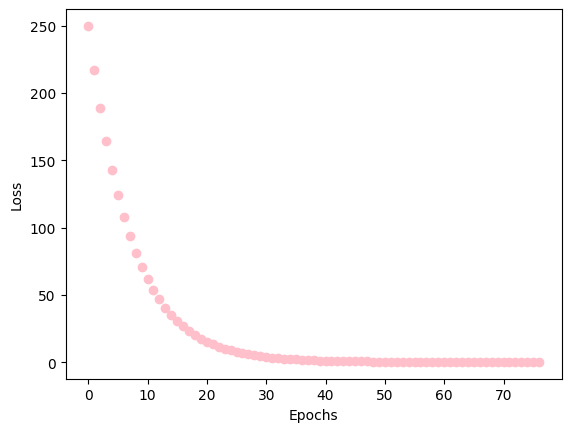

In [141]:
#### Plot loss vs. epochs
plt.plot(result['cost'],"o",color='pink')
plt.xlabel('Epochs')
plt.ylabel('Loss')


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0.5, 1.0, 'learning rate = 0.0005')

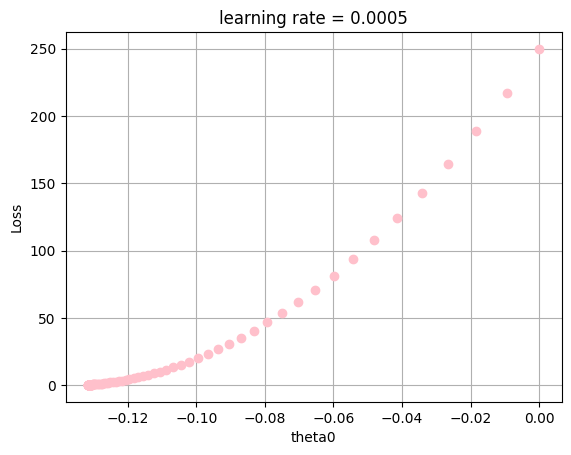

In [142]:
plt.plot(result['theta0_values'],result['cost'],"o",color='pink')
plt.xlabel('theta0')
plt.grid()
plt.ylabel('Loss')
plt.title('learning rate = 0.0005')



Text(0.5, 1.0, 'learning rate = 0.0005')

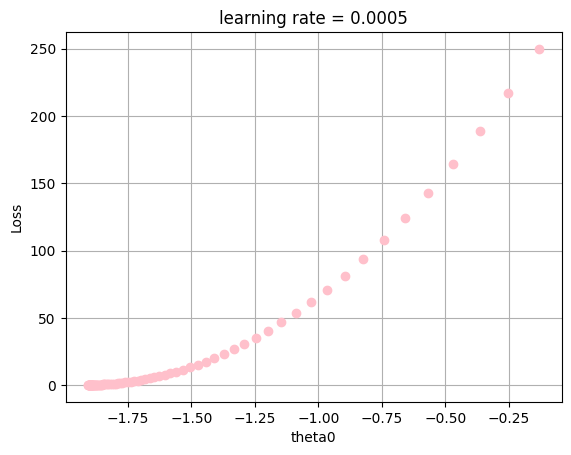

In [23]:
plt.plot(result['theta1_values'],result['cost'],"o",color='pink')
plt.xlabel('theta0')
plt.grid()
plt.ylabel('Loss') 
plt.title('learning rate = 0.0005')


#### Plot all regression lines till converge

Text(0, 0.5, 'y')

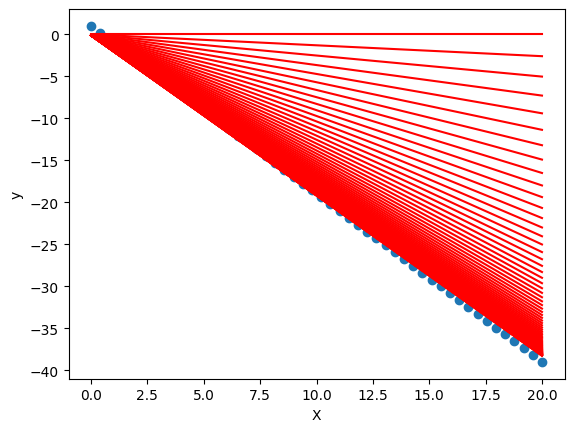

In [143]:
#### Plot all regression lines till converge
plt.plot(X,y,'o')
for i in range(len(result['theta0_values'])):
    plt.plot(X,result['theta0_values'][i]+result['theta1_values'][i]*X,color='red')
plt.xlabel('X')
plt.ylabel('y')


#### Plot the best regression line

Text(0, 0.5, 'y')

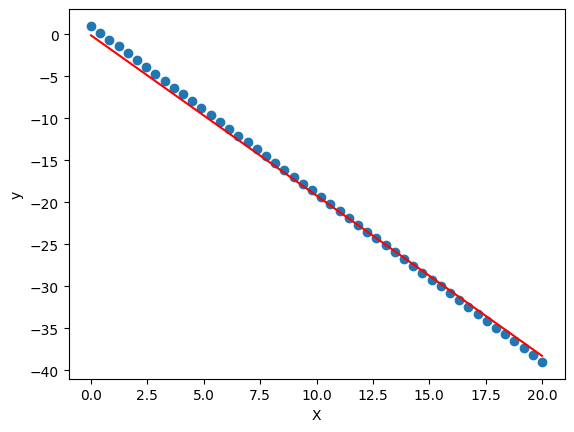

In [144]:
plt.plot(X,y,'o')
plt.plot(X,result['optimum0']+result['optimum1']*X,color='red')
plt.xlabel('X')
plt.ylabel('y')


## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations


In [188]:
import numpy as np

def sgd(X, y, alpha, max_iterations, stop=0.001, convergence=0.001):
    np.random.seed(101)  
    theta0 = 0
    theta1 = 0
    i = 0
    cost = []
    theta0_values = []
    theta1_values = []
    loss=[]
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    while i < max_iterations:

        for j in range(len(X_shuffled)):
            theta0_values.append(theta0)
            theta1_values.append(theta1)
            hx = theta0 + theta1 * X_shuffled[j]
            error = hx - y_shuffled[j]
            cost.append(0.5 * error ** 2)   
            gtheta0 = error
            gtheta1 = error * X_shuffled[j]

            theta0 = theta0 - alpha * gtheta0
            theta1 = theta1 - alpha * gtheta1
            

        #0.5 * np.linalg.norm((theta0 + theta1 * X_shuffled)-y_shuffled) ** 2 / len(X_shuffled)
        
        if len(loss) > 1 and abs(loss[-2] - loss[-1]) < convergence:
            print("Converged based on (stop criteria)")
            break

        if np.linalg.norm(np.array([gtheta0, gtheta1])) < stop:
            print("Gradient descent has converged using (stop criteria).")
            break
        mse = 0.5 * error ** 2
        loss.append(mse)
        print(f"****************** Epoch {i} ********************\n")
        print()
        print(f"cost: {loss[i]}\n")
        print(f"theta0: {theta0}\n")
        print(f"theta1: {theta1}\n")
        print()
        print("Gradient Vector:", gtheta0, gtheta1)
        print()
        print("norm of gradint",np.linalg.norm(np.array([gtheta0, gtheta1])))




        i += 1

    return {
        'theta0_values': theta0_values,
        'theta1_values': theta1_values,
        'cost': cost,
        "loss":loss,
        'optimum0': theta0,
        'optimum1': theta1,
        "x": X_shuffled,
        "y": y_shuffled
    }




##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [189]:
result_sgd = sgd(X, y, alpha=0.0005, max_iterations=300)


****************** Epoch 0 ********************


cost: 0.25209950460007696

theta0: -0.12761222125212127

theta1: -1.8592841835063174


Gradient Vector: 0.7100697213655529 8.984555658094752

norm of gradint 9.012571185993627
****************** Epoch 1 ********************


cost: 0.00017746175474585356

theta0: -0.12397684636948911

theta1: -1.909800583000258


Gradient Vector: 0.0188394137247343 0.23837625529255646

norm of gradint 0.23911955711901475
****************** Epoch 2 ********************


cost: 3.587899143823388e-08

theta0: -0.1168602386254817

theta1: -1.9117125478064034


Gradient Vector: 0.0002678768054096281 0.003389461619468764

norm of gradint 0.0034000305958517907
Converged based on (stop criteria)


In [190]:
r2_score(result_sgd["y"], result_sgd['optimum0'] + result_sgd['optimum1'] *result_sgd['x'])

0.9976568143190673

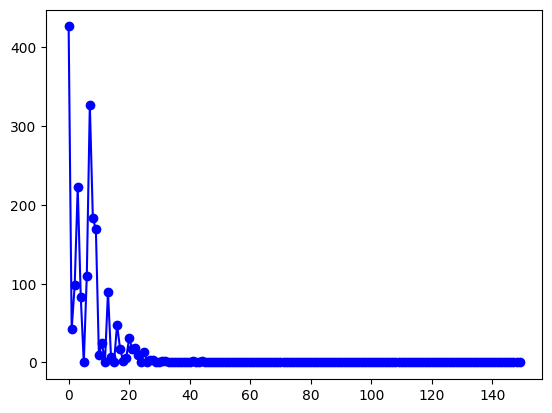

In [191]:
plt.plot(list(range(0,len(result_sgd["cost"]))),result_sgd['cost'],color='blue',marker='o')    

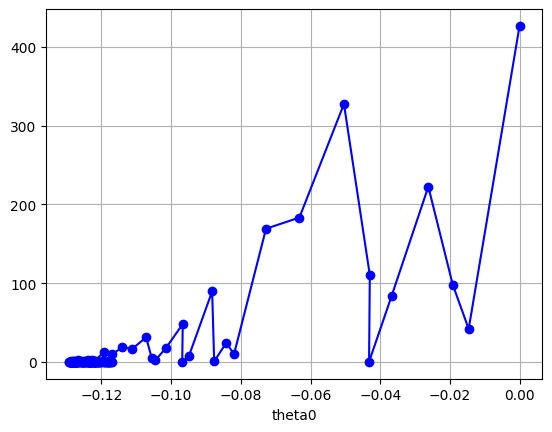

In [192]:
plt.plot(result_sgd["theta0_values"],result_sgd['cost'],color='blue',marker='o')
plt.xlabel('theta0')
plt.grid()
    

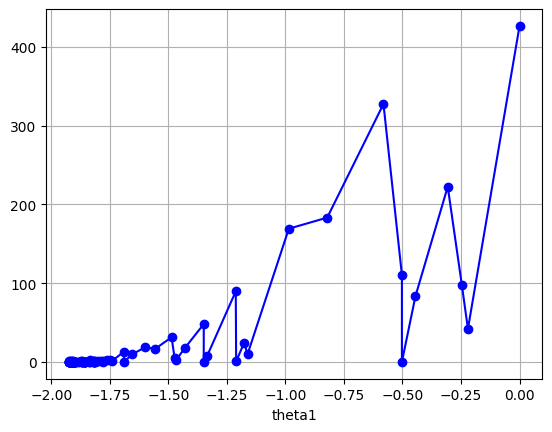

In [193]:
plt.plot(result_sgd["theta1_values"],result_sgd['cost'],color='blue',marker='o')
plt.xlabel('theta1')
plt.grid()
    

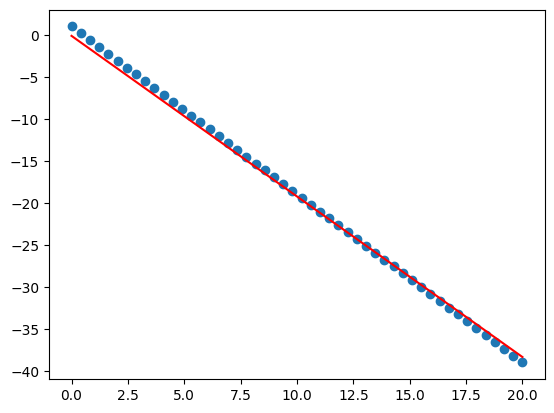

In [194]:
plt.plot(X,y,'o')   
plt.plot(X,result_sgd['optimum0']+result_sgd['optimum1']*X,color='red')

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations


In [112]:

def gradient_descent_mini_batch(X, y, alpha, max_iterations, batch_size, stop=0.001, convergence=0.001):
    theta0 = 0
    theta1 = 0
    i = 0
    cost = []
    loss=[]
    theta0_values = []
    theta1_values = []
    np.random.seed(101)  
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]


    while i < max_iterations:

        for j in range(0, len(X_shuffled), batch_size):
            theta0_values.append(theta0)
            theta1_values.append(theta1)

            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            hx = theta0 + theta1 * X_batch
            error = hx - y_batch

            mse = 0.5 * np.linalg.norm(error) ** 2 / len(X_batch)    
            cost.append(mse)
            

            gtheta0 = np.sum(error) / len(X_batch)
            gtheta1 = np.sum(error * X_batch) / len(X_batch)        

            theta0 = theta0 - alpha * gtheta0
            theta1 = theta1 - alpha * gtheta1


        if np.linalg.norm(np.array([gtheta0, gtheta1])) < stop:
            print("Gradient descent has converged using (stop criteria).")
            break

        if len(loss) > 1 and abs(loss[-2] - loss[-1]) < convergence:
            print("Converged based on (stop criteria)")
            break
    
        loss.append(mse)
        print(f"****************** Epoch {i} ********************\n")
        print(f" cost: {loss[i]}\n")
        print(f"theta0: {theta0}\n")
        print(f"theta1: {theta1}\n")
        print()
        print("Gradient Vector:", gtheta0, gtheta1)
        print()
        print("norm of gradint",np.linalg.norm(np.array([gtheta0, gtheta1])))

        

        

        i += 1

    return {
        'theta0_values': theta0_values,
        'theta1_values': theta1_values,
        'cost': cost,
        "loss":loss,
        'optimum0': theta0,
        'optimum1': theta1,
        "x": X_shuffled,
        "y": y_shuffled
    }




##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [125]:
result=gradient_descent_mini_batch(X, y, alpha=0.0005, max_iterations=300, batch_size=5)

****************** Epoch 0 ********************

 cost: 28.749693808097827

theta0: -0.06978924724113063

theta1: -0.9693635987180408


Gradient Vector: 6.555561615795227 60.781635101959694

norm of gradint 61.13413574891091
****************** Epoch 1 ********************

 cost: 6.467967792096372

theta0: -0.103504017832776

theta1: -1.44799256525687


Gradient Vector: 2.9661984665252215 28.61439114505826

norm of gradint 28.767719999075442
****************** Epoch 2 ********************

 cost: 1.3823105180838944

theta0: -0.11940982177970424

theta1: -1.6843464761632723


Gradient Vector: 1.1944822351113629 12.735258990760588

norm of gradint 12.791153559071402
****************** Epoch 3 ********************

 cost: 0.312788377888108

theta0: -0.12652431396007574

theta1: -1.8010894682190426


Gradient Vector: 0.3201352347847827 4.897541979254299

norm of gradint 4.9079938882509655
****************** Epoch 4 ********************

 cost: 0.13576522889945122

theta0: -0.12929949643754

In [126]:
r2_score(result["y"], result['optimum0'] + result['optimum1'] *result['x'])

0.9976565632956897

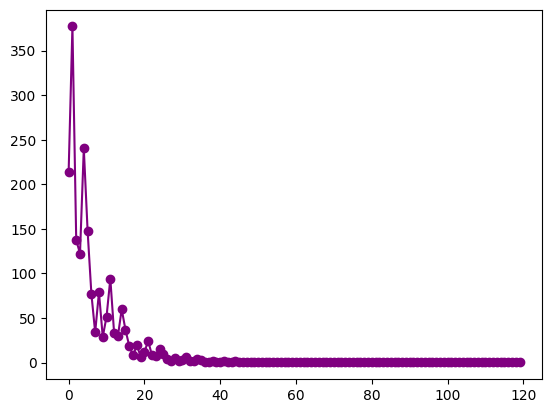

In [127]:
plt.plot(list(range(0,len(result["cost"]))),result['cost'],color='purple',marker='o')

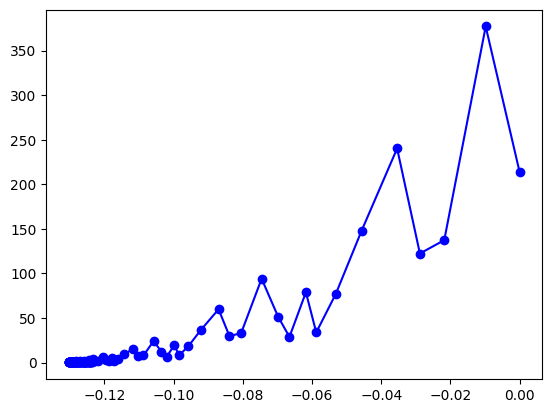

In [128]:
plt.plot(result["theta0_values"],result['cost'],color='blue',marker='o')

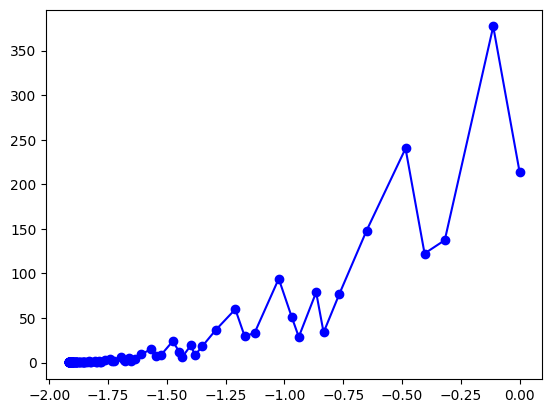

In [129]:
plt.plot(result["theta1_values"],result['cost'],color='blue',marker='o')

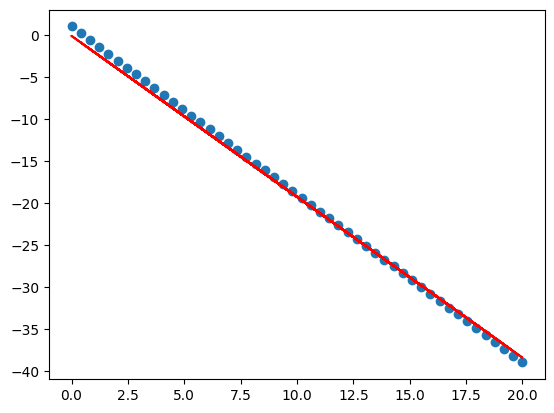

In [130]:
plt.plot(result["x"],result['y'],'o')
plt.plot(result["x"],result['optimum0']+result['optimum1']*result["x"],color='red')